In [15]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [16]:
#Import any library here only.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os
from random import shuffle
import random
import matplotlib.pyplot as plt
from PIL import Image
import random
import matplotlib.pyplot as plt
from PIL import Image


## <font color='orange'>Task #1</font>

Data loading and understanding data

In [17]:
#Setup and check a gpu connection.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [18]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.

In [19]:
# Unzipping the data through google drive as it is faster.
!unzip /content/drive/MyDrive/openCode_23/OpenCodeData.zip

Archive:  /content/drive/MyDrive/openCode_23/OpenCodeData.zip
replace OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
replace OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person10_virus_35.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_475.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_477.jpeg

In [20]:
Images = []
Labels = []

NORMAL_folder = "/content/OpenCodeData/OpenCodeData/NORMAL"
INFECTED_folder = "/content/OpenCodeData/OpenCodeData/INFECTED"

# Function to determine whether the INFECTED image is viral or bacterial.
def infection_type(filename):
  if 'virus' in filename:
    return 'INFECTED_viral'
  elif 'bacteria' in filename:
    return 'INFECTED_bacterial'
  else:
    return 'INFECTED_unknown'



# Defining normalization size of images
target_size = (224, 224)


def resize_image(image_path, target_size):
    img = Image.open(image_path)
    img = img.resize(target_size)
    return img

# Appending the images and their labels to the lists.

for filename in os.listdir(NORMAL_folder):
  image_path = os.path.join(NORMAL_folder,filename)
  image_path = resize_image(image_path,target_size)
  Images.append(image_path)
  Labels.append('NORMAL')


for filename in os.listdir(INFECTED_folder):
  image_path = os.path.join(INFECTED_folder,filename)
  image_path = resize_image(image_path,target_size)
  Images.append(image_path)

  label = infection_type(filename)
  Labels.append(label)



In [21]:
# Count the number of images in each category
num_normal_images = Labels.count('NORMAL')
num_viral_images = Labels.count('INFECTED_viral')
num_bacterial_images = Labels.count('INFECTED_bacterial')

# Print the counts
print(f"Number of NORMAL images: {num_normal_images}")
print(f"Number of Viral images: {num_viral_images}")
print(f"Number of Bacterial images: {num_bacterial_images}")

Number of NORMAL images: 234
Number of Viral images: 148
Number of Bacterial images: 242


In [ ]:
''' Do not change this cell '''
check_data("task1")

In [22]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

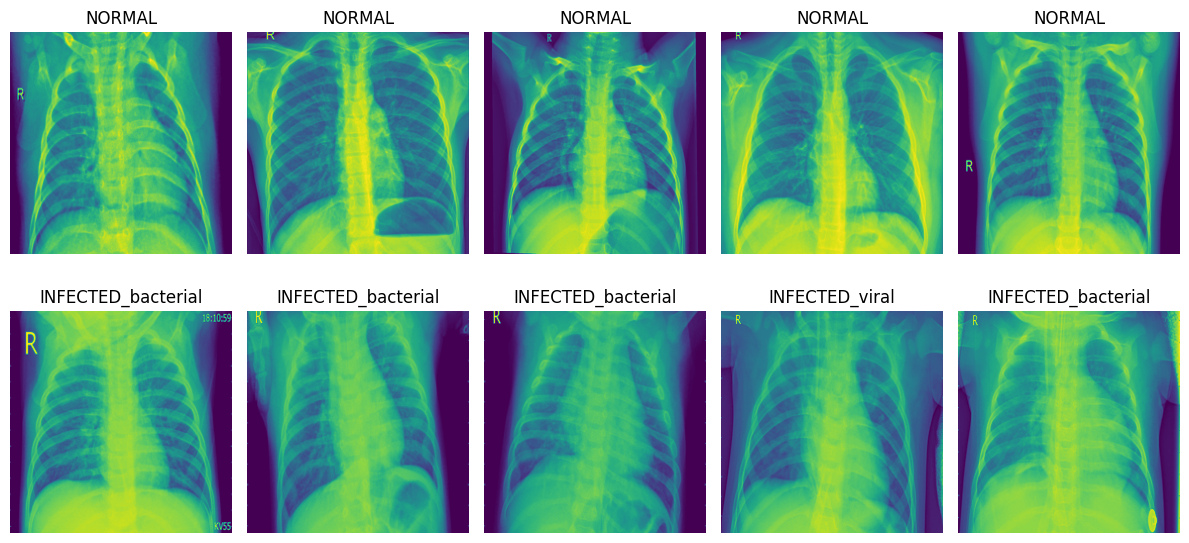

In [23]:


def select_random_images(category_images, num_images, target_size):
    selected_images = random.sample(category_images, num_images)
    return selected_images


# Selecting random NORMAL images
normal_samples = select_random_images(Images[:num_normal_images], 5, target_size)

# Selecting random INFECTED images
infected_samples = select_random_images(Images[num_normal_images:], 5, target_size)
infected_labels = Labels[num_normal_images:num_normal_images + 5]

# Plotting the images
plt.figure(figsize=(12, 6))

for i, img in enumerate(normal_samples, 1):
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title("NORMAL")
    plt.axis('off')

for i, (img, label) in enumerate(zip(infected_samples, infected_labels), 6):
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()
